# Problem Statement

One of the famous quotes from Warren Buffet on investing, “Rule No. 1: Never lose money. Rule No. 2: Never forget rule No.1”. Investment in the stock market can be daunting for the novice investor and when people invest based on emotion, it could be the main reason why people are selling when the price are at it's bottom due to the fear or losing more or buying at a higher price as they are hoping to ride the up trend.<br/>
<br/>
In 2020, algorithmic trading account for [60-73%](https://www.mordorintelligence.com/industry-reports/algorithmic-trading-market#:~:text=Algorithmic%20trading%20is%20accounted%20for,overall%20United%20States%20equity%20trading.) of the overall United State Equity Trading. Hence, the main objective on this project is to enable decisions to be made based on different machine learning models that will enable us to bring emotion out of the equation. Additionally, we are trying to build a machine learning model that will be able to generate return higher than inflation and never forget about Rule No. 1

## Executive Summary
In this notebook, we will be scrapping stock price of companies from the Standard and Poor's 500(S&P500). S&P500 is made up of the 500 large companies listed on the stock exchanges in the United States. This will provide us information of companies of large market capitalization.

### Content
- [Stock Price Scrapping](#Stock-Price-Scrapping)
- [Fundamental Data Scrapping](#Fundamental-Data-Scrapping)
- [KMeans Unsupervised Clustering](#KMeans-Unsupervised-Clustering)

In [22]:
#importing
import yfinance as yf
import pandas as pd
import numpy as np
import requests
import time
import random
import string
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

pd.set_option("display.max_columns", 50)

## Stock Price Scrapping

In [23]:
snp500=pd.read_csv('./data/ticker.csv')

In [24]:
snp500

,Ticker
0,ZTS
1,ZION
2,ZBRA
3,ZBH
4,YUM
...,...
499,ABC
500,ABBV
501,AAPL
502,AAP


In [25]:
#Creating a loop to scrap all stock price for companies in S&P500 using yahoo finance API
snp=pd.DataFrame()
stock_num=1
for ticker in snp500['Ticker']:
    data = yf.download(ticker, group_by="Ticker", period='max')
    data['ticker'] = ticker  # add this column because the dataframe doesn't contain a column with the ticker
    print(f'{stock_num} {ticker}')
    stock_num+=1
    snp=snp.append(data)
    snp.to_csv('./data/snp.csv')

[*********************100%***********************]  1 of 1 completed
1 ZTS
[*********************100%***********************]  1 of 1 completed
2 ZION
[*********************100%***********************]  1 of 1 completed
3 ZBRA
[*********************100%***********************]  1 of 1 completed
4 ZBH
[*********************100%***********************]  1 of 1 completed
5 YUM
[*********************100%***********************]  1 of 1 completed
6 XYL
[*********************100%***********************]  1 of 1 completed
7 XRAY
[*********************100%***********************]  1 of 1 completed
8 XOM
[*********************100%***********************]  1 of 1 completed
9 XLNX
[*********************100%***********************]  1 of 1 completed
10 XEL
[*********************100%***********************]  1 of 1 completed
11 WYNN
[*********************100%***********************]  1 of 1 completed
12 WY
[*********************100%***********************]  1 of 1 completed
13 WU
[*****************

[*********************100%***********************]  1 of 1 completed
108 RMD
[*********************100%***********************]  1 of 1 completed
109 RL
[*********************100%***********************]  1 of 1 completed
110 RJF
[*********************100%***********************]  1 of 1 completed
111 RHI
[*********************100%***********************]  1 of 1 completed
112 RF
[*********************100%***********************]  1 of 1 completed
113 REGN
[*********************100%***********************]  1 of 1 completed
114 REG
[*********************100%***********************]  1 of 1 completed
115 RE
[*********************100%***********************]  1 of 1 completed
116 RCL
[*********************100%***********************]  1 of 1 completed
117 QRVO
[*********************100%***********************]  1 of 1 completed
118 QCOM
[*********************100%***********************]  1 of 1 completed
119 PYPL
[*********************100%***********************]  1 of 1 completed
120 PX

[*********************100%***********************]  1 of 1 completed
214 MA
[*********************100%***********************]  1 of 1 completed
215 LYV
[*********************100%***********************]  1 of 1 completed
216 LYB
[*********************100%***********************]  1 of 1 completed
217 LW
[*********************100%***********************]  1 of 1 completed
218 LVS
[*********************100%***********************]  1 of 1 completed
219 LUV
[*********************100%***********************]  1 of 1 completed
220 LUMN
[*********************100%***********************]  1 of 1 completed
221 LRCX
[*********************100%***********************]  1 of 1 completed
222 LOW
[*********************100%***********************]  1 of 1 completed
223 LNT
[*********************100%***********************]  1 of 1 completed
224 LNC
[*********************100%***********************]  1 of 1 completed
225 LMT
[*********************100%***********************]  1 of 1 completed
226 LLY

[*********************100%***********************]  1 of 1 completed
320 FLIR
[*********************100%***********************]  1 of 1 completed
321 FITB
[*********************100%***********************]  1 of 1 completed
322 FISV
[*********************100%***********************]  1 of 1 completed
323 FIS
[*********************100%***********************]  1 of 1 completed
324 FFIV
[*********************100%***********************]  1 of 1 completed
325 FE
[*********************100%***********************]  1 of 1 completed
326 FDX
[*********************100%***********************]  1 of 1 completed
327 FCX
[*********************100%***********************]  1 of 1 completed
328 FBHS
[*********************100%***********************]  1 of 1 completed
329 FB
[*********************100%***********************]  1 of 1 completed
330 FAST
[*********************100%***********************]  1 of 1 completed
331 FANG
[*********************100%***********************]  1 of 1 completed
33

KeyboardInterrupt: 

## Fundamental Data Scrapping

Fundamental data of a stock is important to help us have a better understanding of the company financial standing and it's valuation by the market. We will be scrapping the fundamental data from [Financial Visualization(FINVIZ)](https://finviz.com/) website. We will start by scrapping Apple(AAPL) stock first before writing a loop to obtain the fundamental data from all other companies in the S&P500. 

In [13]:
ticker='AAPL'
url='https://finviz.com/quote.ashx?t='+ticker

In [14]:
res=requests.get(url,headers={'User-agent':'Mengchin1.0'})

In [15]:
res.status_code

200

In [16]:
soup = BeautifulSoup(res.content,'lxml')

In [15]:
soup

<!DOCTYPE html>
<html>
<head>
<title>AAPL Apple Inc. Stock Quote</title>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=1024" name="viewport"/><meta content="Stock screener for investors and traders, financial visualizations." name="description"/>
<meta content="Stock Screener, Charts, Quotes, Maps, News, Financial Visualizations, Research, Trading Systems" name="keywords"/>
<meta content="no" http-equiv="imagetoolbar"/>
<meta content="no-cache" http-equiv="pragma"/>
<meta content="no-cache" http-equiv="cache-control"/>
<meta content="-1" http-equiv="Expires"/>
<link as="font" crossorigin="" href="/fonts/lato-v17-latin-ext_latin-regular.woff2" rel="preload"/>
<link as="font" crossorigin="" href="/fonts/lato-v17-latin-ext_latin-700.woff2" rel="preload"/>
<link href="/assets/dist/finviz.89b7b09c.css" rel="stylesheet" type="text/css"/>
<link href="/favicon_2x.png" rel="icon" sizes="32x32" type="image/png"/>
<link href="/favicon.png" rel="icon" sizes="16x16" ty

In [16]:
soup.find_all('a',attrs={'class':'tab-link'})

[<a class="tab-link" href="javascript:void(0)" id="publish-chart">publish chart</a>,
 <a class="tab-link" href="/save_to_portfolio.ashx?t=AAPL">save to portfolio</a>,
 <a class="tab-link" href="/create_alert.ashx?t=AAPL">create alert</a>,
 <a class="tab-link" href="quote.ashx?t=AAPL&amp;ty=c&amp;ta=0&amp;p=d">candle</a>,
 <a class="tab-link" href="quote.ashx?t=AAPL&amp;ty=l&amp;ta=0&amp;p=d">line</a>,
 <a class="tab-link" href="quote.ashx?t=AAPL&amp;ty=c&amp;ta=1&amp;p=d"><b>advanced</b></a>,
 <a class="tab-link" href="/elite.ashx">interactive</a>,
 <a class="tab-link" href="/elite.ashx">perf</a>,
 <a class="tab-link" href="elite.ashx">intraday</a>,
 <a class="tab-link" href="quote.ashx?t=AAPL&amp;ty=c&amp;ta=1&amp;p=d"><b>daily</b></a>,
 <a class="tab-link" href="quote.ashx?t=AAPL&amp;ty=c&amp;ta=0&amp;p=w">weekly</a>,
 <a class="tab-link" href="quote.ashx?t=AAPL&amp;ty=c&amp;ta=0&amp;p=m">monthly</a>,
 <a class="tab-link" href="http://www.apple.com" target="_blank"><b>Apple Inc.</b><

In [17]:
# By inspecting the html using google chrome, we will be able to find which the sector the company is in
fundamental=pd.DataFrame({
    'ticker':['AAPL'],
    'sector':[soup.find_all('a',attrs={'class':'tab-link'})[13].text]})

Now we would want to obtain all the information from this table and similarly, by inspecting the html, we know that the each header is under 'td, class='snapshot_td2-cp' and the information is under 'td, class='snapshot-td2' which we could use a loop to obtain all these information
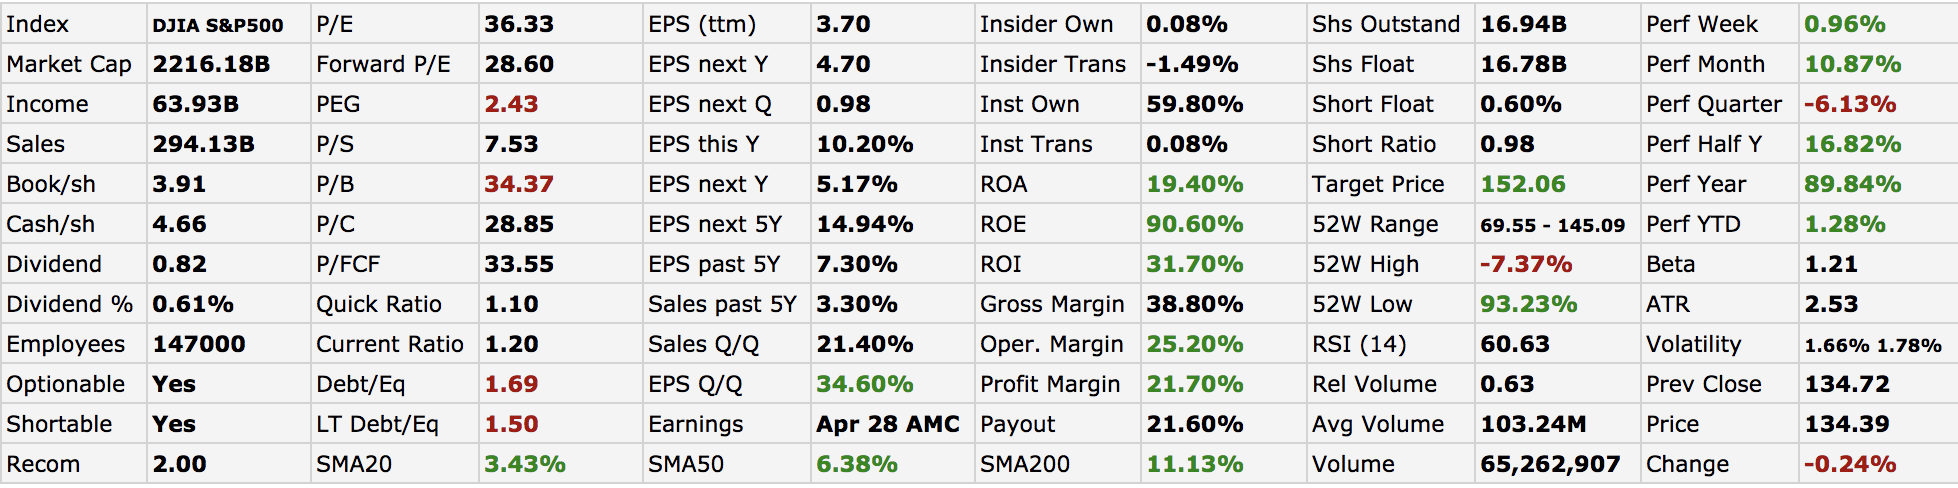

In [17]:
fundamental=pd.DataFrame(fundamental)

In [18]:
for title, value in zip(soup.find_all('td',attrs={'class':'snapshot-td2-cp'}),
                                     soup.find_all('td',attrs={'class':'snapshot-td2'})):
    fundamental[title.text]=value.text

In [19]:
# to randomly define a different agent for each company details
def agent():
    return"".join([(random.choice(string.ascii_uppercase + string.digits)) for i in range(random.randint(10,15))])

In [20]:
# As the above code work, we will now create a loop to obtain information for all other company
fundamental=pd.DataFrame()
for ticker in snp500['Ticker']:
    url='https://finviz.com/quote.ashx?t='+ticker
    res=requests.get(url,headers={'User-agent':agent()})
    if res.status_code == 200:
        soup = BeautifulSoup(res.content,'lxml')
        ticker_f=pd.DataFrame({
            'ticker':[ticker],
            'sector':[soup.find_all('a',attrs={'class':'tab-link'})[13].text]})
        
        for title, value in zip(
            soup.find_all('td',attrs={'class':'snapshot-td2-cp'}),
            soup.find_all('td',attrs={'class':'snapshot-td2'})):
                ticker_f[title.text]=value.text
        
        fundamental=pd.concat([fundamental,ticker_f],axis=0)
        print(f'{ticker} fundamental data obtained successfully')
    
    else:
        print(f'{ticker} get request fail')
    
    sleep_duration = random.randint(5,20)
    print(sleep_duration)
    time.sleep(sleep_duration)

ZTS fundamental data obtained successfully
7
ZION fundamental data obtained successfully
20
ZBRA fundamental data obtained successfully
5
ZBH fundamental data obtained successfully
18
YUM fundamental data obtained successfully
9
XYL fundamental data obtained successfully
15
XRAY fundamental data obtained successfully
20
XOM fundamental data obtained successfully
17
XLNX fundamental data obtained successfully
16
XEL fundamental data obtained successfully
12
WYNN fundamental data obtained successfully
5
WY fundamental data obtained successfully
17
WU fundamental data obtained successfully
16
WST fundamental data obtained successfully
16
WRK fundamental data obtained successfully
9
WRB fundamental data obtained successfully
6
WMT fundamental data obtained successfully
16
WMB fundamental data obtained successfully
14
WM fundamental data obtained successfully
20
WLTW fundamental data obtained successfully
14
WHR fundamental data obtained successfully
20
WFC fundamental data obtained success

NDAQ fundamental data obtained successfully
15
NCLH fundamental data obtained successfully
10
MXIM fundamental data obtained successfully
10
MU fundamental data obtained successfully
9
MTD fundamental data obtained successfully
17
MTB fundamental data obtained successfully
10
MSI fundamental data obtained successfully
6
MSFT fundamental data obtained successfully
20
MSCI fundamental data obtained successfully
15
MS fundamental data obtained successfully
6
MRO fundamental data obtained successfully
8
MRK fundamental data obtained successfully
14
MPWR fundamental data obtained successfully
13
MPC fundamental data obtained successfully
14
MOS fundamental data obtained successfully
12
MO fundamental data obtained successfully
15
MNST fundamental data obtained successfully
8
MMM fundamental data obtained successfully
16
MMC fundamental data obtained successfully
5
MLM fundamental data obtained successfully
17
MKTX fundamental data obtained successfully
13
MKC fundamental data obtained succe

DVN fundamental data obtained successfully
6
DVA fundamental data obtained successfully
8
DUK fundamental data obtained successfully
20
DTE fundamental data obtained successfully
19
DRI fundamental data obtained successfully
17
DRE fundamental data obtained successfully
8
DPZ fundamental data obtained successfully
9
DOW fundamental data obtained successfully
16
DOV fundamental data obtained successfully
10
DLTR fundamental data obtained successfully
19
DLR fundamental data obtained successfully
12
DISH fundamental data obtained successfully
20
DISCK fundamental data obtained successfully
19
DISCA fundamental data obtained successfully
17
DIS fundamental data obtained successfully
11
DHR fundamental data obtained successfully
19
DHI get request fail
15
DGX fundamental data obtained successfully
17
DG fundamental data obtained successfully
14
DFS fundamental data obtained successfully
16
DE fundamental data obtained successfully
8
DD fundamental data obtained successfully
7
DAL fundament

In [ ]:
fundamental.to_csv('./data/fundamental.csv',index=False)

## KMeans Unsupervised Clustering

From the fundamental data obtain from finviz, we will be using KMeans clustering to seperate the companies into 2 different cluster based solely on the fundamental data. By doing so, we hope to determine if the architecture for the modeling would be sufficient in helping to predict prices of stocks from each cluster.

In [ ]:
stock_fund=pd.read_csv('./data/fundamental.csv')

In [ ]:
stock_fund.head()

In [ ]:
stock_fund.columns

Some of the unnecessary data will be dropped such as future expected earning (i.e EPS next Year), current price and short term price change as we are seeking to understand the fundamental behind the company and not just short term gains/loss.

In [242]:
stock_fund.drop(columns=['Shs Outstand','Shs Float','Insider Own','Insider Trans',
                         'Income', 'Inst Own', 'Inst Trans',
                         'Perf Week','Perf Month', 'Perf Quarter', 'Perf Half Y',
                         'Short Float', 'Short Ratio',
                         'EPS next Y','EPS next Q','EPS next 5Y',
                         'Index','Optionable','Shortable',
                         'SMA20','SMA50','SMA200', 'RSI (14)','ATR', 'Beta',
                         'Price','Target Price', 'Rel Volume','Dividend',
                         'Forward P/E','Earnings','Change','52W Range',
                         '52W High','52W Low', 'Employees',
                         'Prev Close','Volume','Avg Volume','Volatility','Recom',
                         'Market Cap', 'Sales'],inplace=True)

In [243]:
stock_fund.columns

Index(['ticker', 'sector', 'P/E', 'EPS (ttm)', 'PEG', 'P/S', 'EPS this Y',
       'Book/sh', 'P/B', 'ROA', 'Perf Year', 'Cash/sh', 'P/C', 'ROE',
       'Perf YTD', 'P/FCF', 'EPS past 5Y', 'ROI', 'Dividend %', 'Quick Ratio',
       'Sales past 5Y', 'Gross Margin', 'Current Ratio', 'Sales Q/Q',
       'Oper. Margin', 'Debt/Eq', 'EPS Q/Q', 'Profit Margin', 'LT Debt/Eq',
       'Payout'],
      dtype='object')

In [244]:
stock_fund.replace("-",0,inplace=True)

In [245]:
stock_fund

,ticker,sector,P/E,EPS (ttm),PEG,P/S,EPS this Y,Book/sh,P/B,ROA,Perf Year,Cash/sh,P/C,ROE,Perf YTD,P/FCF,EPS past 5Y,ROI,Dividend %,Quick Ratio,Sales past 5Y,Gross Margin,Current Ratio,Sales Q/Q,Oper. Margin,Debt/Eq,EPS Q/Q,Profit Margin,LT Debt/Eq,Payout
0,ZTS,Healthcare,49.39,3.42,4.32,11.88,9.90%,7.93,21.32,12.60%,34.39%,0,0,50.00%,2.16%,61.30,38.30%,14.90%,0.59%,2.30,7.00%,69.40%,3.00,7.90%,29.90%,1.91,-7.40%,24.50%,1.75,23.20%
1,ZION,Financial,17.27,3.04,0,3.61,-27.30%,44.73,1.17,0.60%,81.85%,52.02,1.01,7.10%,20.98%,29.59,20.30%,19.30%,2.59%,0,5.20%,0,0,-11.70%,76.10%,0.18,73.50%,21.10%,0.18,44.50%
2,ZBRA,Technology,52.07,9.36,5.21,5.80,-7.20%,40.16,12.14,10.20%,144.40%,3.18,153.49,26.50%,26.81%,28.81,38.10%,17.60%,0,0.40,4.00%,45.00%,0.70,9.70%,14.60%,0.58,18.20%,11.30%,0.41,0.00%
3,ZBH,Healthcare,0,-0.69,0,5.26,-112.30%,58.74,3.02,-0.60%,62.35%,3.85,46.04,-1.20%,15.11%,41.56,-23.40%,0.20%,0.54%,1.00,3.20%,69.90%,2.00,-1.90%,-1.20%,0.67,4.20%,-2.00%,0.63,0
4,YUM,Consumer Cyclical,40.01,2.94,3.17,6.20,-28.80%,-26.13,0,14.80%,35.75%,2.45,48.01,-11.20%,8.53%,60.53,7.10%,48.90%,1.70%,1.00,-2.50%,47.50%,1.00,2.90%,26.60%,0,-31.30%,16.00%,0,62.90%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,ABC,Healthcare,0,-15.89,0,0.13,-530.90%,-3.41,0,-7.50%,39.76%,24.02,5.03,-224.80%,23.66%,10.95,8.70%,-105.20%,1.46%,0.60,6.90%,2.80%,1.00,9.70%,-2.50%,0,100.50%,-1.70%,0,0
499,ABBV,Healthcare,40.61,2.71,10.07,4.20,-48.50%,7.39,14.89,3.40%,35.08%,4.85,22.69,51.10%,2.71%,21.20,-2.80%,12.70%,4.73%,0.70,14.90%,66.40%,0.80,59.20%,24.80%,6.58,-99.40%,9.90%,5.93,173.80%
500,AAPL,Technology,35.67,3.70,2.43,7.55,10.20%,3.91,33.74,19.40%,91.15%,4.56,28.90,90.60%,-0.57%,33.61,7.30%,31.70%,0.62%,1.10,3.30%,38.80%,1.20,21.40%,25.20%,1.69,34.60%,21.70%,1.50,21.60%
501,AAP,Consumer Cyclical,28.03,7.14,2.00,1.27,4.40%,52.58,3.81,4.10%,77.23%,12.99,15.41,13.50%,27.17%,19.93,2.20%,11.80%,0.50%,0.40,0.70%,44.40%,1.30,12.00%,6.90%,0.00,19.70%,4.90%,0.29,14.80%


In [246]:
#We will now define a function to change all the percentage to float
def remove_percent(value):
    try:
        return float(value.replace('%',""))
    except:
        return value

In [247]:
for column in stock_fund.columns:
    stock_fund[column]=stock_fund[column].apply(remove_percent)

In [248]:
stock_fund.set_index('ticker',inplace=True)

In [249]:
stock_fund['sector'].value_counts()

Industrials               72
Technology                71
Financial                 69
Consumer Cyclical         66
Healthcare                63
Consumer Defensive        35
Real Estate               29
Utilities                 28
Communication Services    26
Energy                    23
Basic Materials           21
Name: sector, dtype: int64

In [251]:
stock_fund_dum=stock_fund.drop(columns=['sector'])

In [252]:
sc=StandardScaler()
stock_fund_sc=sc.fit_transform(stock_fund_dum)

In [253]:
kmeans=KMeans(n_clusters=2,random_state=42)
kmeans.fit(stock_fund_sc)

KMeans(n_clusters=2, random_state=42)

In [254]:
stock_fund['cluster']=kmeans.labels_

In [255]:
cluster_1=stock_fund[stock_fund['cluster']==1]

In [256]:
cluster_2=stock_fund[stock_fund['cluster']==0]

In [263]:
cluster_1['sector'].value_counts()

Technology                52
Healthcare                39
Industrials               32
Consumer Cyclical         19
Consumer Defensive        18
Financial                 15
Communication Services    11
Basic Materials            8
Real Estate                6
Energy                     1
Name: sector, dtype: int64

In [264]:
cluster_2['sector'].value_counts()

Financial                 54
Consumer Cyclical         47
Industrials               40
Utilities                 28
Healthcare                24
Real Estate               23
Energy                    22
Technology                19
Consumer Defensive        17
Communication Services    15
Basic Materials           13
Name: sector, dtype: int64

In [279]:
cluster_1.describe()-cluster_2.describe()

,P/E,EPS (ttm),PEG,P/S,EPS this Y,Book/sh,P/B,ROA,Perf Year,Cash/sh,P/C,ROE,Perf YTD,P/FCF,EPS past 5Y,ROI,Dividend %,Quick Ratio,Sales past 5Y,Gross Margin,Current Ratio,Sales Q/Q,Oper. Margin,Debt/Eq,EPS Q/Q,Profit Margin,LT Debt/Eq,Payout,cluster
count,-101.000000,-101.000000,-101.000000,-101.000000,-101.000000,-101.000000,-101.000000,-101.000000,-101.000000,-101.000000,-101.000000,-101.000000,-101.000000,-101.000000,-101.000000,-101.000000,-101.000000,-101.000000,-101.000000,-101.000000,-101.000000,-101.000000,-101.000000,-101.000000,-101.000000,-101.000000,-101.000000,-101.000000,-101.0
mean,-7.032606,7.292388,-0.884702,4.638713,87.325192,-951.300718,13.959153,10.851466,-15.573958,-0.504635,-44.601786,35.459927,-8.907041,27.463039,23.979386,15.145908,-1.133381,0.954171,7.194664,20.887093,1.104120,20.151539,13.173525,0.055149,132.583974,15.397122,0.447628,-37.971227,1.0
std,-108.479345,11.890716,-8.759624,2.346962,-45.913188,-16436.986572,25.916409,1.187947,-16.142253,4.487170,-531.436113,54.069498,-1.166391,23.367318,0.449275,4.215637,-0.637952,0.580625,0.970273,-5.298029,0.584094,-2.373244,-13.430732,1.145288,464.578182,-7.212704,1.892567,-104.130871,0.0
min,0.000000,28.290000,0.000000,0.330000,741.400000,-41.210000,0.000000,28.200000,-2.010000,0.000000,0.000000,-16.300000,14.560000,0.000000,45.900000,92.800000,0.000000,0.000000,15.000000,32.300000,0.000000,43.200000,86.000000,0.000000,816.500000,68.000000,0.000000,0.000000,1.0
25%,25.850000,3.112500,1.990000,2.817500,60.675000,-4.360000,3.207500,6.400000,3.485000,2.680000,9.017500,12.575000,-7.747500,24.340000,22.700000,8.300000,-0.862500,1.000000,5.100000,33.250000,1.200000,14.825000,15.300000,-0.352500,38.625000,11.300000,-0.260000,0.000000,1.0
50%,14.565000,2.730000,1.135000,4.090000,30.900000,-6.040000,5.100000,8.350000,-15.805000,3.625000,9.220000,15.100000,-9.095000,24.365000,16.100000,10.400000,-1.215000,0.700000,5.600000,23.550000,0.800000,11.500000,11.450000,-0.310000,20.500000,11.450000,-0.270000,-8.050000,1.0
75%,19.020000,4.025000,0.552500,6.120000,28.075000,-11.947500,11.555000,10.900000,-28.922500,3.190000,8.382500,24.400000,-10.272500,32.170000,19.400000,14.200000,-1.450000,1.000000,6.825000,18.300000,1.100000,17.100000,11.200000,-0.370000,8.325000,13.600000,-0.202500,-19.175000,1.0
max,-737.250000,170.590000,-105.670000,-8.290000,0.000000,-286112.060000,161.890000,31.100000,-183.710000,310.400000,-9278.290000,570.400000,-24.990000,349.700000,72.800000,147.800000,-2.580000,4.700000,6.300000,-2.300000,6.400000,-3.400000,3.900000,-6.060000,6401.300000,-8.600000,-0.230000,-677.100000,1.0


In [284]:
cluster_1

,sector,P/E,EPS (ttm),PEG,P/S,EPS this Y,Book/sh,P/B,ROA,Perf Year,Cash/sh,P/C,ROE,Perf YTD,P/FCF,EPS past 5Y,ROI,Dividend %,Quick Ratio,Sales past 5Y,Gross Margin,Current Ratio,Sales Q/Q,Oper. Margin,Debt/Eq,EPS Q/Q,Profit Margin,LT Debt/Eq,Payout,cluster
ticker,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ZTS,Healthcare,49.39,3.42,4.32,11.88,9.9,7.93,21.32,12.6,34.39,0.00,0.00,50.0,2.16,61.30,38.3,14.9,0.59,2.3,7.0,69.4,3.0,7.9,29.9,1.91,-7.4,24.5,1.75,23.2,1
ZBRA,Technology,52.07,9.36,5.21,5.80,-7.2,40.16,12.14,10.2,144.40,3.18,153.49,26.5,26.81,28.81,38.1,17.6,0.00,0.4,4.0,45.0,0.7,9.7,14.6,0.58,18.2,11.3,0.41,0.0,1
YUM,Consumer Cyclical,40.01,2.94,3.17,6.20,-28.8,-26.13,0.00,14.8,35.75,2.45,48.01,-11.2,8.53,60.53,7.1,48.9,1.70,1.0,-2.5,47.5,1.0,2.9,26.6,0.00,-31.3,16.0,0.00,62.9,1
XLNX,Technology,49.25,2.50,5.47,10.02,-8.9,10.60,11.61,11.6,35.85,13.38,9.20,25.6,-13.18,40.29,5.8,21.1,1.23,3.3,5.9,69.2,3.6,11.0,24.0,0.77,7.5,20.3,0.57,59.8,1
WST,Healthcare,70.49,4.57,3.12,10.97,42.5,25.09,12.83,13.8,89.18,8.41,38.26,20.8,13.60,94.20,28.7,15.9,0.21,2.1,8.9,35.8,2.7,23.3,19.0,0.14,52.6,16.1,0.14,13.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ADBE,Technology,44.05,11.52,2.52,17.66,80.5,28.28,17.94,23.9,50.63,10.42,48.69,45.1,1.43,41.73,54.3,30.6,0.00,1.3,21.8,87.5,1.3,26.3,34.7,0.00,33.4,40.7,0.30,0.0,1
ACN,Technology,34.33,8.45,3.52,4.20,7.3,28.79,10.08,14.5,68.39,13.87,20.91,31.5,11.08,26.00,10.6,28.9,1.21,1.4,6.1,31.7,1.4,8.5,14.9,0.00,15.1,11.9,0.00,39.1,1
ABT,Healthcare,49.11,2.52,3.15,6.30,24.5,18.46,6.69,6.5,29.35,4.05,30.51,14.4,12.80,68.92,7.8,9.7,1.46,1.3,11.1,56.8,1.7,28.7,15.8,0.57,108.8,13.0,0.57,56.8,1


In [267]:
cluster_2.describe()

,P/E,EPS (ttm),PEG,P/S,EPS this Y,Book/sh,P/B,ROA,Perf Year,Cash/sh,P/C,ROE,Perf YTD,P/FCF,EPS past 5Y,ROI,Dividend %,Quick Ratio,Sales past 5Y,Gross Margin,Current Ratio,Sales Q/Q,Oper. Margin,Debt/Eq,EPS Q/Q,Profit Margin,LT Debt/Eq,Payout,cluster
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.00000,302.000000,302.000000,302.0
mean,59.408675,1.709901,6.164901,3.443775,-40.309272,985.647185,4.519007,0.734106,75.323311,18.315232,85.373079,0.236093,17.994106,29.252781,-4.060232,3.582450,2.071291,0.765232,2.682450,32.216887,0.984437,-4.722185,10.035430,1.665000,5.436424,3.96457,1.459834,67.450331,0.0
std,212.487173,8.054095,30.422106,3.509803,240.520141,16509.946384,8.724110,6.835421,71.812729,58.319238,589.380511,56.978634,12.650968,59.461659,19.831189,14.912573,1.600449,0.646393,8.693897,27.495040,0.793447,25.179276,26.470491,4.124363,225.458485,20.44808,3.636264,140.370994,0.0
min,0.000000,-29.740000,0.000000,0.000000,-918.700000,-43.580000,0.000000,-37.400000,-19.270000,0.000000,0.000000,-598.800000,-28.710000,0.000000,-67.900000,-105.200000,0.000000,0.000000,-23.800000,-32.300000,0.000000,-99.500000,-95.900000,0.000000,-966.800000,-98.60000,0.000000,0.000000,0.0
25%,0.000000,-0.162500,0.000000,1.302500,-71.775000,13.570000,1.522500,0.000000,27.605000,1.230000,4.722500,-0.575000,9.347500,0.000000,-15.000000,0.700000,0.862500,0.000000,-1.000000,5.450000,0.000000,-11.625000,0.000000,0.422500,-44.525000,0.00000,0.420000,0.000000,0.0
50%,20.575000,2.210000,1.955000,2.390000,-20.000000,26.320000,2.570000,1.850000,64.865000,4.105000,13.100000,7.100000,16.495000,15.865000,0.000000,5.400000,1.975000,0.800000,2.400000,30.050000,1.000000,-1.800000,9.350000,0.840000,0.000000,5.55000,0.790000,31.650000,0.0
75%,33.150000,4.415000,4.017500,4.120000,12.125000,48.207500,4.505000,4.300000,105.462500,10.680000,32.177500,14.000000,25.342500,31.720000,8.100000,9.600000,3.140000,1.100000,5.975000,51.100000,1.500000,5.800000,17.200000,1.560000,52.275000,11.60000,1.372500,63.475000,0.0
max,1894.310000,58.610000,411.130000,36.230000,2300.000000,286947.120000,111.090000,14.800000,575.230000,467.840000,9751.820000,315.500000,77.660000,653.020000,57.100000,76.100000,7.690000,3.600000,44.500000,99.600000,3.600000,152.800000,92.200000,60.260000,1365.400000,99.80000,54.070000,935.100000,0.0


In [328]:
cluster_2[cluster_2['Payout']=935.1]

,sector,P/E,EPS (ttm),PEG,P/S,EPS this Y,Book/sh,P/B,ROA,Perf Year,Cash/sh,P/C,ROE,Perf YTD,P/FCF,EPS past 5Y,ROI,Dividend %,Quick Ratio,Sales past 5Y,Gross Margin,Current Ratio,Sales Q/Q,Oper. Margin,Debt/Eq,EPS Q/Q,Profit Margin,LT Debt/Eq,Payout,cluster
ticker,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
XYL,Industrials,77.80,1.40,4.28,4.01,-36.6,16.48,6.62,3.1,57.68,0.00,0.00,8.8,7.16,43.12,-5.6,5.6,1.03,1.5,5.9,37.5,1.8,0.1,7.5,1.04,25.3,5.2,0.84,73.7,0
WMB,Energy,136.71,0.17,27.34,3.69,-75.9,9.67,2.40,0.5,31.60,0.12,200.66,1.7,15.91,18.76,17.3,3.2,7.06,0.6,1.0,79.1,0.6,-0.7,15.0,1.90,-16.8,2.7,1.83,935.1,0
WFC,Financial,29.76,1.44,0.00,3.95,-89.8,39.57,1.08,0.1,59.33,117.40,0.36,1.0,41.48,5.54,-36.9,7.6,0.94,0.0,-0.6,0.0,0.0,-32.9,62.2,1.30,4.5,3.7,1.30,431.2,0
WELL,Real Estate,0.00,-0.26,0.00,6.90,-122.0,38.27,1.98,3.0,70.76,3.67,20.58,6.1,17.04,129.48,-16.8,1.6,3.23,0.0,3.6,44.3,0.0,-11.1,10.7,0.87,-110.0,21.3,0.87,114.5,0
WEC,Utilities,25.63,3.79,4.20,4.19,5.9,33.19,2.93,3.4,0.79,0.08,1222.81,11.5,5.57,0.00,10.1,5.8,2.79,0.4,4.1,68.3,0.5,-0.7,23.0,1.36,-1.9,16.6,1.12,66.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AVB,Real Estate,32.68,5.89,12.87,11.59,4.7,77.19,2.49,4.3,20.37,1.57,122.90,7.6,19.93,86.61,1.3,2.6,3.31,0.0,4.4,64.2,0.0,-6.4,20.6,0.71,104.0,35.9,0.71,106.6,0
AMCR,Consumer Cyclical,23.63,0.49,3.09,1.45,6.7,3.07,3.79,4.7,39.35,0.49,23.98,16.5,-1.02,55.07,-7.0,7.4,4.03,0.8,5.3,21.4,1.3,2.0,9.3,1.35,20.9,6.2,1.34,93.6,0
AES,Utilities,514.91,0.06,63.18,1.95,-85.8,3.96,7.15,0.1,123.34,2.14,13.24,1.9,20.51,50.82,-32.6,5.3,2.12,0.9,-3.0,27.9,1.0,5.3,14.5,7.55,501.7,0.5,7.00,824.6,0


From the 2 different clusters, we will proceed to try and predict the price from Apple(AAPL) and Williams Companies Inc(WMB).

In [26]:
stock=pd.read_csv('./data/snp.csv',parse_dates=['Date'],index_col=['Date'])

Text(0.5, 1.0, 'Stock Price for WMB and AAPL')

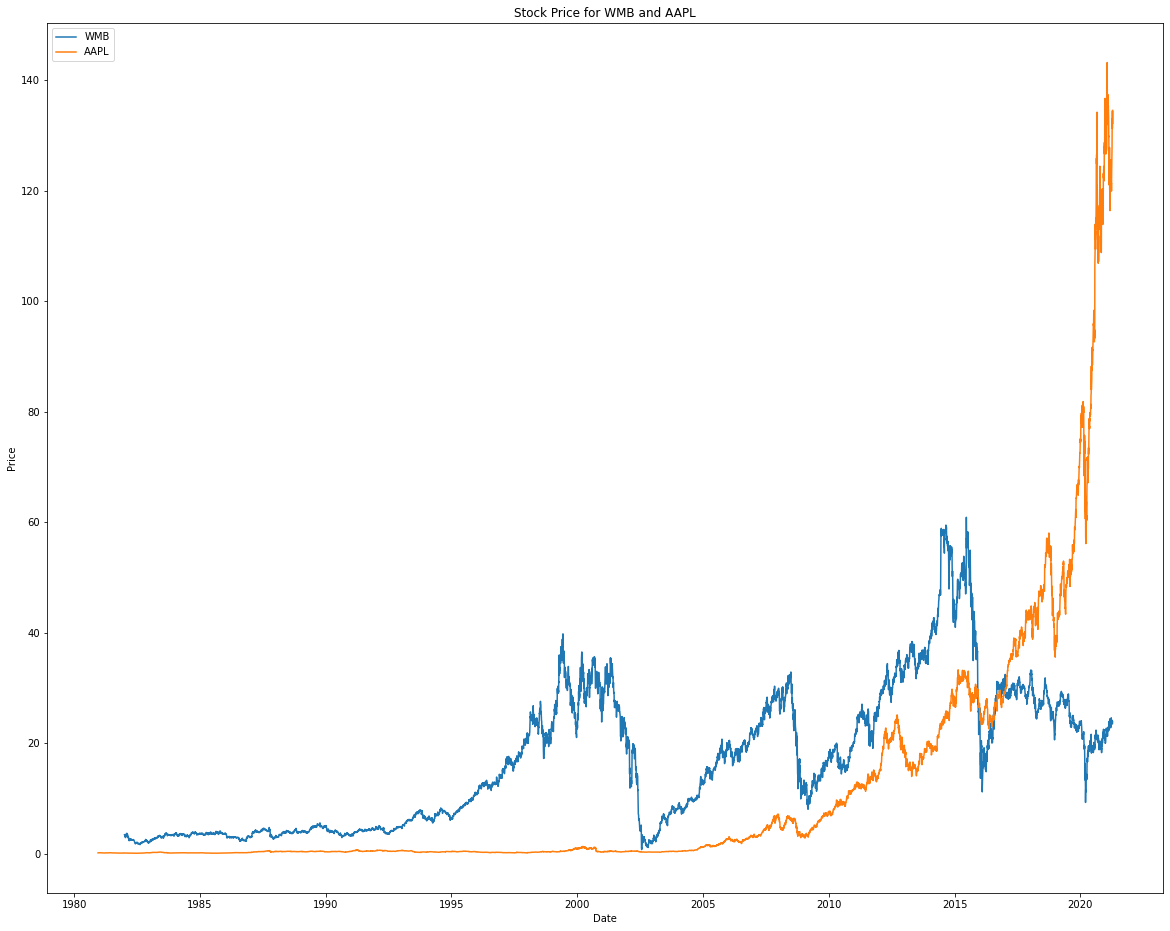

In [27]:
plt.figure(figsize=(20,16))
plt.plot(stock[stock['ticker']=='WMB']['Close'],label='WMB')
plt.plot(stock[stock['ticker']=='AAPL']['Close'],label='AAPL')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.title('Stock Price for WMB and AAPL')

In [28]:
aapl_wmb=stock[(stock['ticker']=='WMB')|(stock['ticker']=='AAPL')]

In [30]:
aapl_wmb.to_csv('./data/aapl_wmb.csv')